In [1]:
import pandas as pd
import glob
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from metpy.units import units
import metpy.calc as mpcalc

/projects/daqu2831/Lundquist_research/res_env/lib/python3.10/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
points = pd.read_csv('../points2.csv')

LLJ_files_nwf = glob.glob('../LLJ_files/nwf_done/*.csv')
LLJ_files_la100 = glob.glob('../LLJ_files/la100_done/*.csv')
LLJ_files_ca100 = glob.glob('../LLJ_files/ca100_done/*.csv')

In [3]:
# load location data for each wf zone
call_area_locs = pd.read_csv('../../turbine_locs/ca100_turbines.csv', sep=' ', header=None)
lease_area_locs = pd.read_csv('../../turbine_locs/la100_turbines.csv', sep=' ', header=None)

In [4]:
LLJ_files_nwf.sort()
LLJ_files_la100.sort()
LLJ_files_ca100.sort()

In [5]:
points = points.sort_values(by='1')

make a plot of all the points used

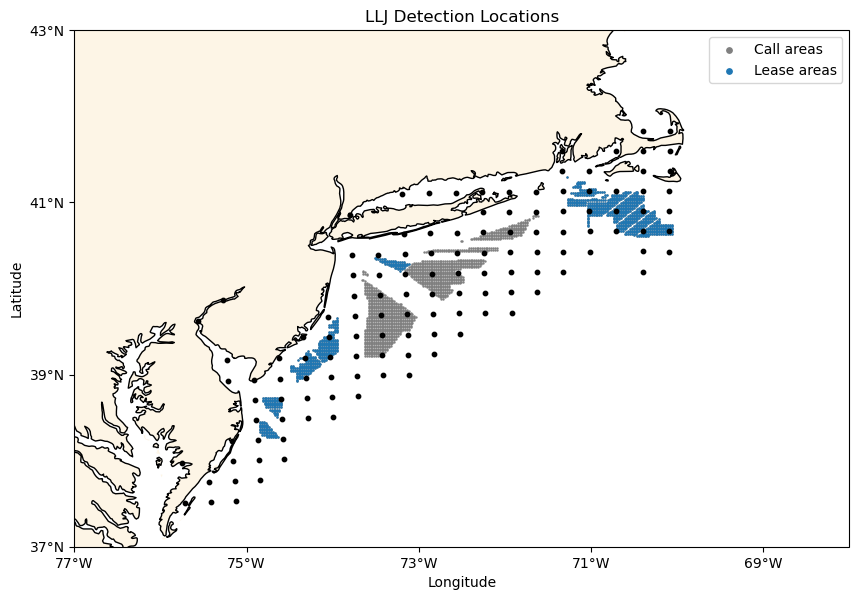

In [7]:
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('LLJ Detection Locations')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.scatter(call_area_locs[1], call_area_locs[0], s=2, c='grey', marker='.', zorder=0, label="Call areas")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=2, c='tab:blue', marker='.', zorder=0, label="Lease areas")

ax.scatter(points['0'], points['1'], s=10, color='k')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]
lgnd.legend_handles[1]._sizes = [60]

plt.xlabel('Longitude')
plt.ylabel('Latitude')

fig.savefig('locs.png', bbox_inches='tight')

#### make a figure that shows the % of LLJ occurrences in the NWF simulations with a different shading, like white (none) to green (30% of the time)?

In [6]:
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    counts_nwf.append(len(loc.dropna()))

In [7]:
nwf_pct = (np.array(counts_nwf) / 8784)*100

In [10]:
nwf_pct.min(), nwf_pct.max()

(14.127959927140255, 27.424863387978142)

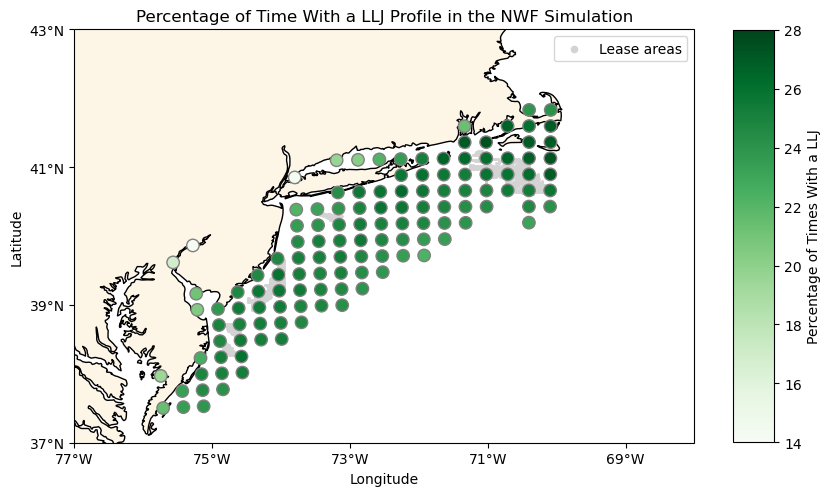

In [11]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Percentage of Time With a LLJ Profile in the NWF Simulation')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=80, 
               c=nwf_pct, 
               cmap='Greens', 
               zorder=10, 
               vmin=14, vmax=28, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percentage of Times With a LLJ')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [80]

fig.savefig('nwf_pct.png', bbox_inches='tight')

#### Make a map showing the percent difference between NWF and LA100/CA100 occurrences

In [8]:
# find the counts for each location in each simulation
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    counts_nwf.append(len(loc.dropna()))
    
counts_nwf_short = [] # for comparing to call area sim
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    # subset to match ca100 times
    loc = pd.concat([loc.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                     loc.set_index('Time').loc['2020-07-01':]]).reset_index()
    counts_nwf_short.append(len(loc.dropna()))
    
counts_la = []
for f in LLJ_files_la100:
    # open the file
    loc = pd.read_csv(f)
    counts_la.append(len(loc.dropna()))
    
counts_ca = []
for f in LLJ_files_ca100:
    # open the file
    loc = pd.read_csv(f)
    counts_ca.append(len(loc.dropna()))

In [9]:
# convert to numpy array
counts_nwf = np.array(counts_nwf)
counts_nwf_short = np.array(counts_nwf_short)
counts_la = np.array(counts_la)
counts_ca = np.array(counts_ca)

In [14]:
counts_nwf.min(), counts_nwf.max(), counts_nwf.mean()

(1241, 2409, 2151.6666666666665)

In [9]:
counts_nwf_short.min(), counts_nwf_short.max(), counts_nwf_short.mean()

(370, 877, 708.5793650793651)

In [10]:
counts_la.min(), counts_la.max(), counts_la.mean()

(1237, 2324, 2024.2777777777778)

In [11]:
counts_ca.min(), counts_ca.max(), counts_ca.mean()

(357, 813, 606.3333333333334)

calcualte the percent difference between nwf and wf

In [10]:
ladiff = ((counts_nwf - counts_la) / counts_nwf)*100

In [11]:
cadiff = ((counts_nwf_short - counts_ca) / counts_nwf_short)*100

In [12]:
ladiff.min(), ladiff.max()

(-1.5065913370998116, 30.478260869565215)

In [13]:
cadiff.min(), cadiff.max()

(-1.8957345971563981, 49.217638691322904)

In [14]:
# fig = plt.figure(figsize=(10,8))
# projection = ccrs.PlateCarree()
# ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

# ax.coastlines()
# ax.add_feature(cfeature.LAND, facecolor='lightgrey')
# # ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

# plt.title('% difference in LLJ occurrences between NWF and LA100')
# ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

# lon_formatter = LongitudeFormatter(degree_symbol='')
# lat_formatter = LatitudeFormatter(degree_symbol='')

# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)

# m = ax.scatter(points['0'], points['1'], s=ladiff, c=ladiff, cmap=matplotlib.cm.bwr.reversed(), zorder=10, alpha=0.4, vmin=-30, vmax=30)

# plt.colorbar(m, shrink=0.67, aspect=10, label='% difference')

# handles, labels = m.legend_elements(prop="sizes", alpha=0.6)
# legend = ax.legend(handles, labels, loc="upper right", title="Sizes")

# fig.savefig('la100_occmap1.png')

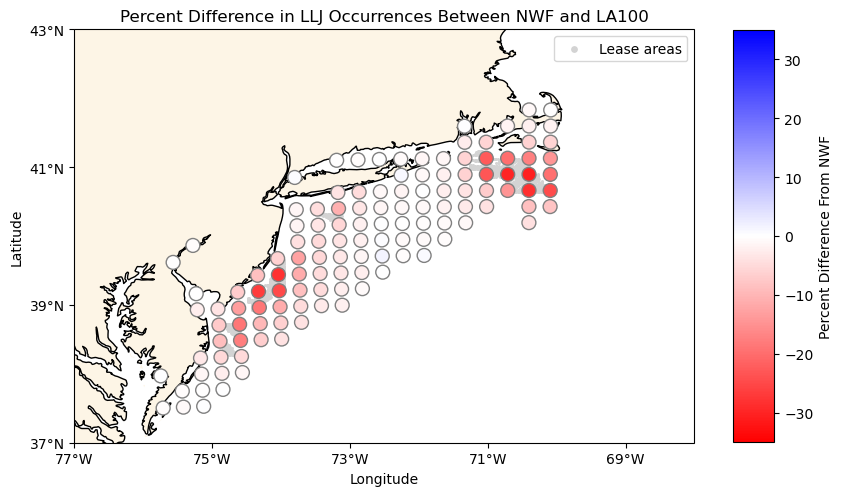

In [21]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Percent Difference in LLJ Occurrences Between NWF and LA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=ladiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-35, vmax=35, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Difference From NWF')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]

fig.savefig('la100_occmap2.png', bbox_inches='tight')

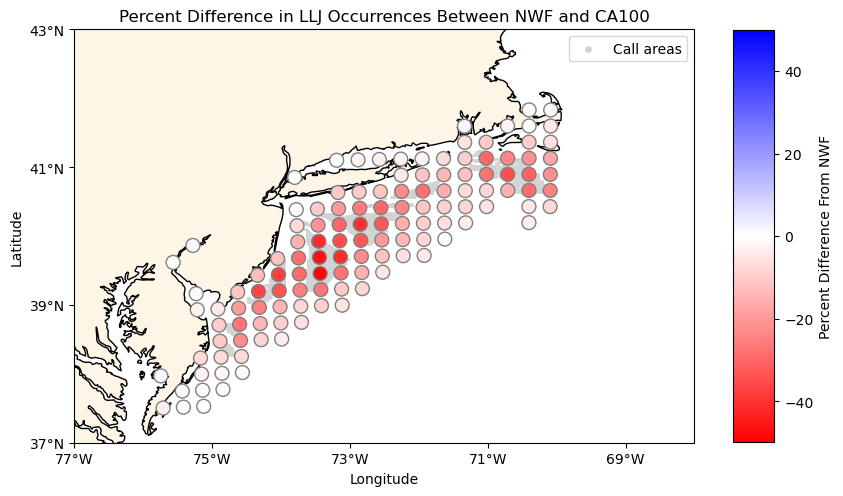

In [19]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Percent Difference in LLJ Occurrences Between NWF and CA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=cadiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-50, vmax=50, 
               edgecolor='grey')

ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Call areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Difference From NWF')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]

fig.savefig('ca100_occmap2.png', bbox_inches='tight')

### make same map for mean nose heights

In [13]:
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    counts_nwf.append(loc['Nose height (meters)'].dropna().mean())
    
counts_nwf_short = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    loc = pd.concat([loc.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                     loc.set_index('Time').loc['2020-07-01':]]).reset_index()
    counts_nwf_short.append(loc['Nose height (meters)'].dropna().mean())
    
counts_la = []
for f in LLJ_files_la100:
    # open the file
    loc = pd.read_csv(f)
    counts_la.append(loc['Nose height (meters)'].dropna().mean())
    
counts_ca = []
for f in LLJ_files_ca100:
    # open the file
    loc = pd.read_csv(f)
    counts_ca.append(loc['Nose height (meters)'].dropna().mean())

In [14]:
counts_nwf = np.array(counts_nwf)
counts_nwf_short = np.array(counts_nwf_short)
counts_la = np.array(counts_la)
counts_ca = np.array(counts_ca)

In [19]:
counts_nwf.min(), counts_nwf.max(), counts_nwf.mean()

(328.1589901790992, 473.8724860315069, 360.25571959274095)

In [20]:
counts_nwf_short.min(), counts_nwf_short.max(), counts_nwf_short.mean()

(328.1468303933129, 479.7061128977183, 358.9331017778384)

In [21]:
counts_la.min(), counts_la.max(), counts_la.mean()

(333.96388290813417, 487.0880119659616, 380.24713771362224)

In [22]:
counts_ca.min(), counts_ca.max(), counts_ca.mean()

(332.90173238563233, 553.0164279571728, 407.6848377226369)

In [15]:
ladiff = ((counts_nwf - counts_la) / counts_nwf)*100
cadiff = ((counts_nwf_short - counts_ca) / counts_nwf_short)*100

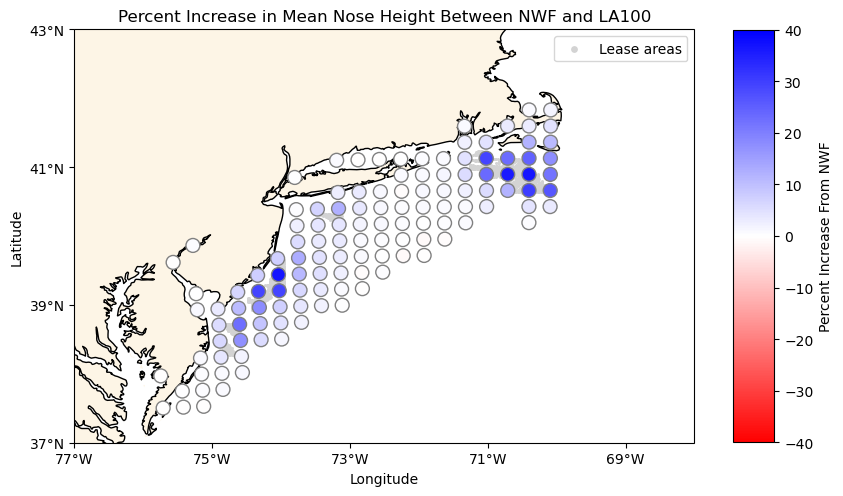

In [25]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')

plt.title('Percent Increase in Mean Nose Height Between NWF and LA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=ladiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-40, vmax=40, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Increase From NWF')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]

fig.savefig('la100_nhmap2.png', bbox_inches='tight')

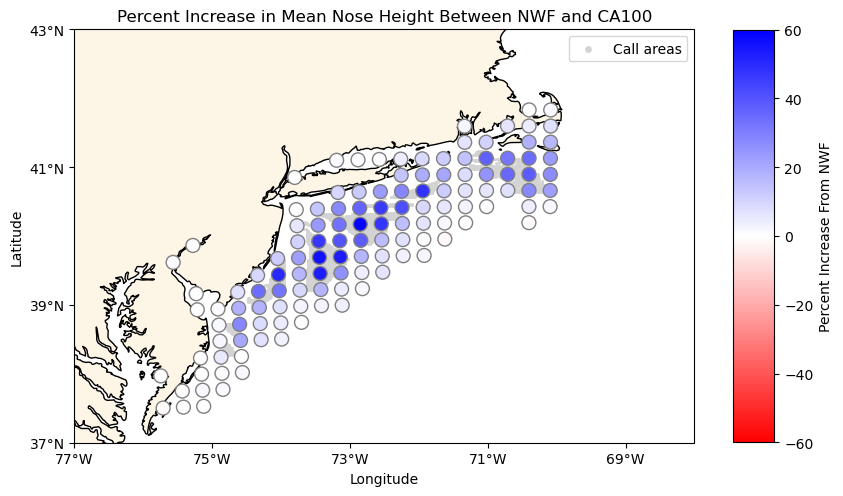

In [26]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')

plt.title('Percent Increase in Mean Nose Height Between NWF and CA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=cadiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-60, vmax=60, 
               edgecolor='grey')

ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Call areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Increase From NWF')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]

fig.savefig('ca100_nhmap2.png', bbox_inches='tight')

### make plots with just the decrease, not in percent

In [16]:
ladiff = counts_nwf - counts_la
cadiff = counts_nwf_short - counts_ca

In [17]:
ladiff.min(), ladiff.max()

(-129.20034386015982, 3.1617327259629064)

In [18]:
cadiff.min(), cadiff.max()

(-204.80481198256285, 5.709287023163938)

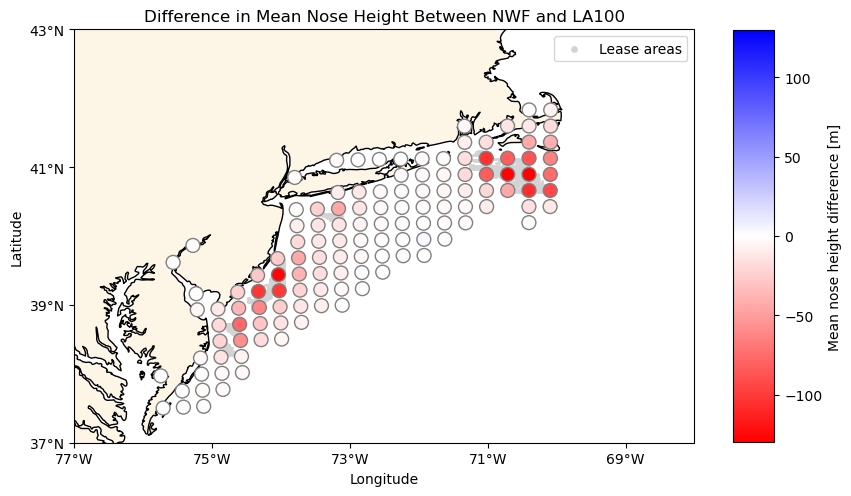

In [20]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')

plt.title('Difference in Mean Nose Height Between NWF and LA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=ladiff, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-130, vmax=130, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Mean nose height difference [m]')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]

fig.savefig('la100_nhmap3.png', bbox_inches='tight')

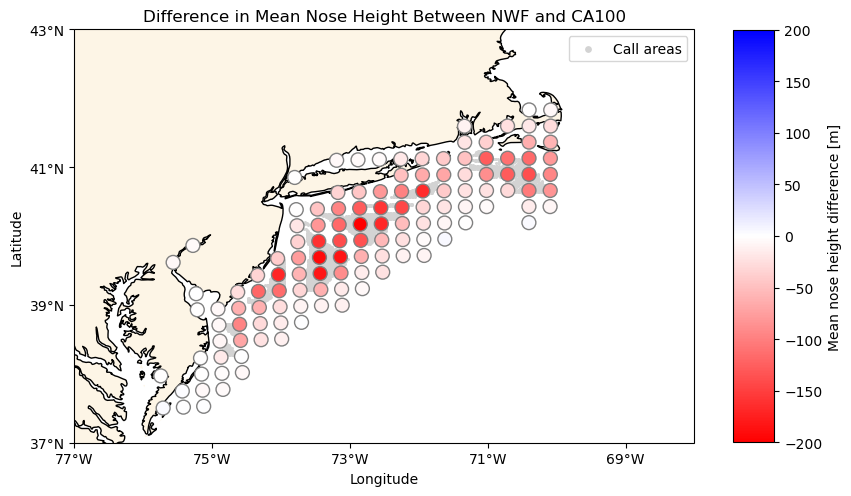

In [21]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')

plt.title('Difference in Mean Nose Height Between NWF and CA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=cadiff, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-200, vmax=200, 
               edgecolor='grey')

ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Call areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Mean nose height difference [m]')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]

fig.savefig('ca100_nhmap3.png', bbox_inches='tight')

#### make a new bubble figure to show nose height variability in the NWF simulations with a different color shading?

In [22]:
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    counts_nwf.append(loc['Nose height (meters)'].dropna().mean())
    
counts_nwf = np.array(counts_nwf)

In [23]:
counts_nwf.mean()

360.25571959274095

In [24]:
counts_nwf.min(), counts_nwf.max()

(328.1589901790992, 473.8724860315069)

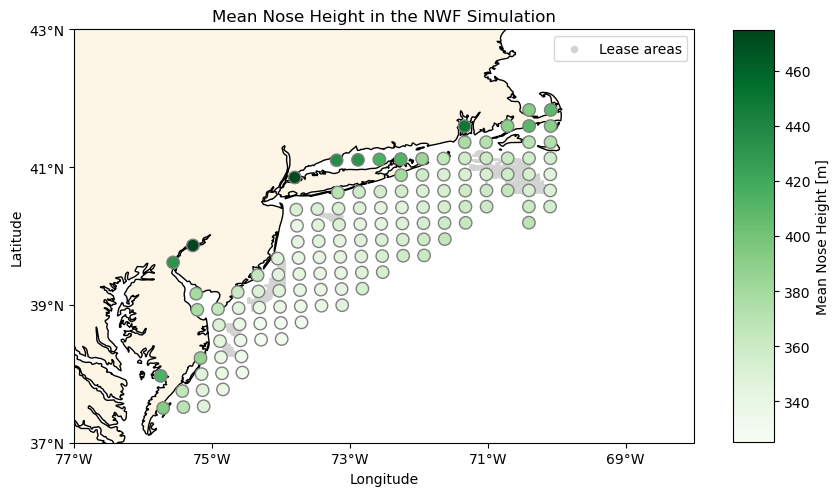

In [24]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Mean Nose Height in the NWF Simulation')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=80, 
               c=counts_nwf, 
               cmap='Greens', 
               zorder=10, 
               vmin=325, vmax=475, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Mean Nose Height [m]')

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [80]

fig.savefig('nwf_nh.png', bbox_inches='tight')

#### make a quiver plot of mode wind direction at each point

In [25]:
# we need to reduce the mean wind directions into x and y components
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    rounded = (np.around(loc['Wind direction at nose (degrees)'].dropna()/15)*15)%360 # and modded
    counts_nwf.append(rounded.mode()[0])
    
counts_nwf = np.array(counts_nwf)

In [26]:
counts_nwf

array([240., 240., 210., 195., 210., 210., 255., 210., 210., 210., 210.,
       210., 210., 210., 210., 225., 225., 195., 210., 225., 225., 240.,
       240., 195., 210., 210., 225., 225., 240., 240., 225., 210., 210.,
       225., 225., 240., 240., 240., 210., 210., 225., 225., 240., 240.,
       240., 240., 210., 225., 225., 225., 240., 240., 240., 240., 240.,
       210., 225., 225., 225., 240., 240., 240., 240., 210., 210., 225.,
       225., 225., 240., 240., 240., 240., 240., 195., 210., 225., 225.,
       225., 225., 240., 240., 240., 240., 240., 240., 210., 225., 225.,
       225., 225., 240., 240., 240., 240., 240., 240.,   0., 225., 225.,
       240., 240., 240., 240., 240., 240., 345., 210., 225., 225., 225.,
       240., 240., 240., 240., 240., 240., 240., 240., 240., 240., 240.,
       240., 240., 240., 240., 240.])

In [27]:
# now find the components
speed = (np.zeros(126)+1) * units('m/s')
wdir = counts_nwf * units.degrees

u, v = mpcalc.wind_components(speed, wdir)

In [28]:
u = u.magnitude
v = v.magnitude

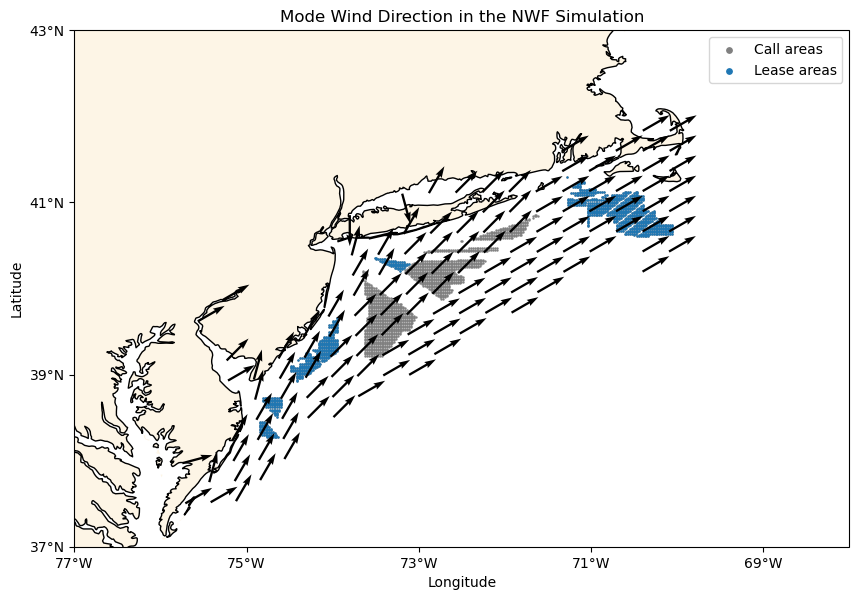

In [29]:
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Mode Wind Direction in the NWF Simulation')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.scatter(call_area_locs[1], call_area_locs[0], s=2, c='grey', marker='.', zorder=0, label="Call areas")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=2, c='tab:blue', marker='.', zorder=0, label="Lease areas")

ax.quiver(points['0'], points['1'], u, v, width=0.003, scale=25)

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]
lgnd.legend_handles[1]._sizes = [60]

fig.savefig('modewdir.png', bbox_inches='tight')